# Linerar Regression


Predicting a response using single feature. It is a method to predict dependant variable (Y) 
based on the values of independant variable (X)
Simple linear regression is useful for finding relationship between two continuous variables. 
One is predictor or independent variable and other is response or dependent variable. For example, relationship between Salary and Experience.

Equation: Y(pred) = b0 + b1*x
where, 

Y(pred): Value to be predicted

b0 : y-intercept (the point from line has started)

b1 : Slope

X: Independant variables/ predictors



# Steps:

Step 1: Exploratory data analysis on the data

*Import the libraries

*Ingest the dataset

*Check for missing data

*Describe the data (find the relation between Y and X)

Step 2: Split the dataset into Training and Testing

Step 3: Fit the model to data

Step 4: Predict the result

Step 5: Find the error using error metrix


# Step 1: EDA

In [12]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
# Import the dataset using Panda library
df = pd.read_csv("C:/Users/a/Himanshu/iris.csv")

In [6]:
# Preview the dataset
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [7]:
# Information of columns and thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Unnamed: 0      150 non-null int64
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
# Find the co-relation into variables
df.corr()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Unnamed: 0,1.000000,0.716676,-0.402301,0.882637,0.900027
Sepal.Length,0.716676,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.402301,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.882637,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.900027,0.817941,-0.366126,0.962865,1.000000


In [9]:
# Find the statistics of the data
df.describe()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
# Check if there are any null values
df.isnull().values.any()

False

In [13]:
# removing the unnecessary column
df = df.iloc[:,1:6]

In [14]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


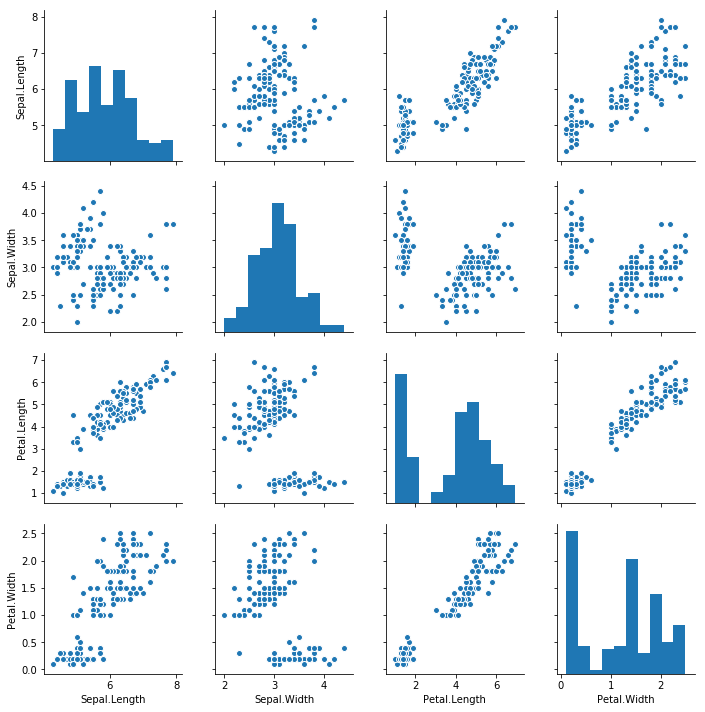

In [15]:
# Visualise the co-relation of the variables
sb.pairplot(df)

# Step 2: Split the dataset into Training and Testing

In [36]:
# Selecting the variable for training and testing dataset
# Training: X,Y
# Testing: X1,Y1

X=df[["Petal.Width"]]
Y=df[["Petal.Length"]]
X1=df[["Sepal.Length"]]
Y1=df[["Petal.Length"]]



from sklearn.model_selection import train_test_split

# test_size = 0.2 (split the dataset into 80:20 ratio)
# Training: 80%, Testing: 20%
# random_state:  is used for initializing the internal random number generator, 
# which will decide the splitting of data into train and test indices in your case

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)



# Step 3: Fit the model to data

In [37]:
# Fitting Simple Linear Regression Model to the training set

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)

In [24]:
# Slope
b1 = model.coef_
b1

array([[2.2282589]])

In [25]:
# y-intercept (the point from line has started)
b0 = model.intercept_
b0

array([1.07469446])

# Step 4: Predict the result

In [38]:
pred = model.predict(xtest)

In [27]:
ytest['Predicted_Length'] = pred

C:\Users\a\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
# Compare the Predicted_length with input value
ytest.head(10)

,Petal.Length,Predicted_Length
20,1.7,1.520346
5,1.7,1.965998
3,1.5,1.520346
101,5.1,5.308386
82,3.9,3.748605
80,3.8,3.525779
123,4.9,5.085560
145,5.2,6.199690
74,4.3,3.971431
107,6.3,5.085560


# Step 5: Find the error percentage using error metrix

In [30]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(ytest['Petal.Length'],ytest['Predicted_Length'])

print("Overall model error is %.2f"%MAE)

Overall model error is 0.36
